# Lab 7 - More Gradient descent 
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu))
- **Date:** 11 March 2020
- **Course:** INFO 251: Applied machine learning

### Topics:
1. OLS in matrix form using gradient descent
2. 
3. Mini-Batch and stochastic variants


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import IPython
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from scipy import stats


### Python indexing
Vector vs array in python reference:https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

In [2]:
# np.squeeze, 
# np.expand_dims(,axis =1) equiv v=v[:,np.newaxis]


### Standardization illustration

$J=J_1(x,y)=\frac{x^2}{8}+y^2$  where I use $x,y$ for $x$ and $y$ coordinate or $z_1,z_2$ as in slides

perform gradeint descent on this function.
Gradients are :
$\frac{\partial J_1(x,y)}{\partial x}=2x/8$ and  $\frac{\partial J_1(x,y)}{\partial y}=2y$


In [35]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

def func_f(x, y):
    # Simple function with 2 inputs
    # Calculate values of Z from the created grid
    # feel free to check other functions too
    f = x**2/8+y**2 # call this f1
    #f = x**2+y**2 # standardized
    return f

def gradient_descent(px, py, learning_rate, epoch):
    x_gd = []
    y_gd = []
    f_gd = []
    x_gd.append(px) # 1st coordinate
    y_gd.append(py)  # 2nd coordinate
    f_gd.append(func_f(px, py)) # value of function
    # begin the loops to update x, y and z
    for i in range(epoch):
        #der_x = 2*(1.5-px+px*py)*(py-1)+2*(2.25-px+px*py**2)*(py**2-1)+2*(2.625-px+px*py**3)*(py**3-1) # for f2
        #der_y = 2*(1.5-px+px*py)*px+2*(2.25-px+px*py**2)*(2*py*px)+2*(2.625-px+px*py**3)*(3*py**2*px) # for f2
        der_x = 2*px/8
        #der_x = 2*px # standardized
        der_y = 2*py
        px = px - learning_rate * der_x
        x_gd.append(px)
        py = py - learning_rate * der_y
        y_gd.append(py)
        f_gd.append(func_f(px, py))
    return x_gd, y_gd, f_gd

In [36]:
x0 = 2.1
y0 = 2
learning_rate = 0.2
epoch = 1500
''' Plot our function '''
a = np.arange(-4, 4, 0.05)
b = np.arange(-4, 4, 0.05)

x, y = np.meshgrid(a, b)
f = func_f(x, y)
#IPython.embed()


### Plot the function

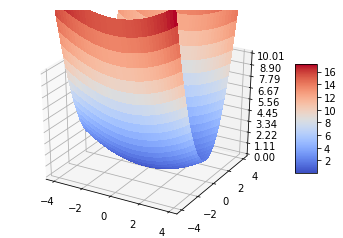

In [37]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

 # Customize the z axis.

ax.set_zlim(-0.0, 10.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

#Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Plot the convergence of GD

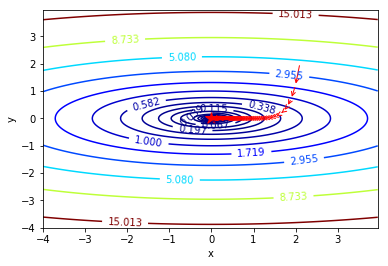

In [38]:

fig1, ax1 = plt.subplots()
cp = ax1.contour(x, y, f, levels=np.logspace(-4, 4, 35), cmap='jet')
ax1.clabel(cp, inline=True, fontsize=10)
#Plot target (the minimum of the function)
min_point = np.array([3.0, 0.5])
min_point_ = min_point[:, np.newaxis]
ax1.plot(0.0, 0.0, 'r*', markersize=12) #This is the min for f1
#ax1.plot(3.0, 0.5, 'r*', markersize=12) #This is the min for f2
ax1.set_xlabel(r'x')
ax1.set_ylabel(r'y')
x_gd, y_gd, z_gd = gradient_descent(x0, y0, learning_rate, epoch)
for i in range(1, epoch+1):
   ax1.annotate('', xy=(x_gd[i], y_gd[i]), xytext=(x_gd[i-1], y_gd[i-1]),
                  arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                  va='center', ha='center')

''' Animation '''
# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], 'bo')
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

plt.show()

### Regression on Boston data

For this lab, let's keep using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).


Assume we want to regress MEDV on the following independent variables

CRIM - per capita crime rate by town (1)

NOX - nitric oxides concentration (parts per 10 million) (5)

RM - average number of rooms per dwelling (6)

First we try with sklearn

In [7]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
# regress Y (median value) on nitric oxides concentration, # rooms and crime rate 
X_CRIM = X[:,0] # crime rate
X_NOX = X[:,4] #nitric oxides concentration (parts per 10 million)
X_RM = X[:,5] # number of rooms
Y = np.array(y) # median house value
n = len(y)
Xr = np.column_stack((X_CRIM, X_NOX, X_RM))


# Check with sklearn linea_models
reg = LinearRegression().fit(Xr, Y)
print("intercept {} and slopes {} from regression".format(reg.intercept_, reg.coef_))
#print(Xr)

intercept -19.059431390380585 and slopes [ -0.19532978 -13.37211867   7.91003124] from regression


### Reminder:
OLS objective is $J(\alpha,\beta)=\frac{1}{2N}||Y-\alpha-X\beta||^2$ and its gradients are: 
\begin{align*}
&\frac{\partial J(\alpha,\beta)}{\partial \alpha}=\frac{1}{N}(Y-\alpha -X\boldsymbol\beta).sum() \\
&\frac{\partial J(\alpha,\beta)}{\partial \beta}=\frac{1}{N}(X^TY-X^T\alpha-X^TX\boldsymbol\beta)=\frac{1}{N}X^T	(Y-\alpha -X\boldsymbol\beta)
\end{align*}

The GD update steps are:
\begin{align*}
&\alpha\leftarrow \alpha-R \frac{\partial J(\alpha,\beta)}{\partial \alpha}\\
&\beta\leftarrow \beta -R\frac{\partial J(\alpha,\beta)}{\partial \beta}
\end{align*}

In [33]:
# learning rate R, run GD for at most MaxIterations
def multivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000):  
    # Initialize variablse
    N, m = np.shape(xvalues)
    alpha_old = np.random.rand()
    beta_old = np.random.rand(m)
    alpha_new = np.random.rand()
    beta_new = np.random.rand(m)
    # tolerance and iteration counter
    cost_list = np.empty(1)
    epsilon = 1e-6
    cnt = 0
#     xvalues_init = xvalues # for Mini-batch implementation
#     yvalues_init = yvalues # for Mini-batch implementation
    while(np.abs(alpha_old-alpha_new) > epsilon or np.max(np.abs(beta_old-beta_new)) > epsilon):
        # do GD update steps for as long as the values have not converged,
        # which is equivalent to the gradient values being greater than epsilon
        alpha_old = alpha_new
        beta_old = beta_new
        #IPython.embed()
        # The following Code implements mini-batch GD
#         ind = np.random.choice(N, 1, replace=False)
#         xvalues = xvalues_init[ind, :]
#         yvalues = yvalues_init[ind]
#         N, _ = xvalues.shape 
        alpha_new = alpha_old - R / N * ((alpha_old +  np.dot(xvalues, beta_old) - yvalues).sum())
        beta_new = beta_old - R / N * np.dot(xvalues.T, (alpha_old +  np.dot(xvalues, beta_old)  - yvalues))
        # you might want to print the cost to check it is descreasing
        cost = 1.0 / (2* N) * np.linalg.norm(yvalues - alpha_new - np.dot(xvalues, beta_new))**2
        cost_list= np.append(cost_list, cost)
        # If it takes too many iterations terminate
        cnt += 1
        if cnt > MaxIterations:
            print('Iterations exceeded maximum number. Stopping...')
            break
        
        
    return alpha_new, beta_new, cnt, cost_list


    

### Now with GD

In [34]:
inter, slope, iters, cost_list = multivariate_ols(Xr, Y, 0.01, 100000)
print('intercept is {} and slope is {}'.format(inter, slope))
print('In {} iterations'.format(iters))

Iterations exceeded maximum number. Stopping...
intercept is -19.016455785978682 and slope is [ -0.19523976 -13.40314239   7.90591435]
In 100001 iterations


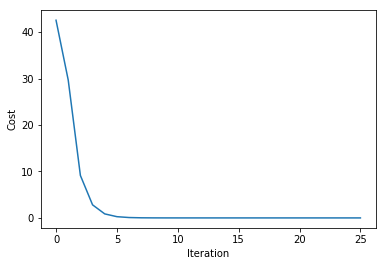

In [28]:
#IPython.embed()
plt.plot(np.arange(iters), cost_list[1:])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

### Logistic Regression
Label is 0 or 1 depending on whether median house value is less or greater than 40,000$.

In [32]:
# create new binary column using lambda functions (dataframes)
df['EXPENSIVE'] = df.apply(lambda x: 1 if x['MEDV'] > 40 else 0, axis = 1)

# numpy arrays
label = np.where(bdata.target > 40, 1.0, 0.0)


NameError: name 'df' is not defined

Multivariate Logistic Regression update rules

In [ ]:
vec_1 = 1.0 /(1 + np.exp(-(alpha_old + np.dot(xvalue_matrix, beta_array_old)))) - yvalues
alpha -= R / n * (vec_1.sum())
beta_array -= R / n * (np.dot(np.transpose(xvalue_matrix), vec_1))